![](FBD.png)
Equations:
$$T = 1/2m((\dot{z})^2+(\dot{y})^2)$$
$$y = lsin\theta \dot{y} = l\dot{\theta} cos\theta$$
$$v = mgz$$
$$L = 1/2m((-l{\dot \theta})^2 + (l cos\theta)^2) - mglcos\theta$$
$$d/dt(\partial L/(\partial \dot{y})) - \partial L/\partial y = f$$
$$\partial L/\partial \dot{y} = ml\dot{\theta} cos\theta$$
$$\partial L/\partial \dot{\theta} = m \dot{\theta} l^2$$
$$d/dt(\partial L/ \partial \dot{\theta}) - \partial L/ \partial \theta = 0$$
$$\partial L/\partial y = 0$$
$$\partial L/\partial \theta = mglsin\theta$$

Equations:
$$T = \frac{1}{2m}((\dot z)^2+(\dot y)^2)$$
$$y = lsin\theta \dot y = l \dot \theta cos\theta$$
$$v = mgz$$
$$L = \frac{1}{2m}((-l\dot \theta)^2 + (l cos\theta)^2) - mglcos\theta$$
$$\frac{d}{dt}(\frac{\partial L}{\partial \dot y}) - \frac{\partial L}{\partial y} = f$$
$$\frac{\partial L}{\partial \dot y} = ml\dot \theta cos\theta$$
$$\frac{\partial L}{\partial \dot \theta} = m \dot \theta l^2$$
$$\frac{d}{dt}(\frac{\partial L}{ \partial \dot \theta}) - \frac{\partial L}{ \partial \theta} = 0$$
$$\frac{\partial L}{\partial y} = 0$$
$$\frac{\partial L}{\partial \theta} = mglsin\theta$$

$$ml(\ddot{\theta} - \dot{\theta} sin\theta) = f$$
$$m\ddot{\theta} l^2 - mglsin\theta = 0$$

Using the small angle approximation $cos\theta$ and $sin\theta = \theta$:
$$ml \ddot{\theta} \theta = f$$
$$m \ddot{\theta} l^2 - mgl\theta = 0$$
$$m \ddot{\theta} = mgsin\theta$$
$$\dot{\omega} = g\theta/l$$
$$J\ddot{\theta} = (f-mgsin\theta)l$$
$$\dot{\omega} = f/ml\theta$$
$$\dot{\omega} = fl/J - mgl\theta/J$$
$$f = f - mg\theta$$

$$\Longrightarrow \begin{bmatrix} \dot{\theta} \\ \dot{\omega} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} \theta \\ \omega \end{bmatrix} + \begin{bmatrix} 0 \\ l/J \end{bmatrix} f_m'$$

For torque and force:
$$\tau = rf = -(k^2/R)\omega + (k/R)e$$
$$m\ddot{y} = f - mg\theta$$
$$f = -(k^2/Rr)\omega + (k/Rr)e$$

For state variables $\omega$ and $\theta$:
$$\theta[n + 1] = \theta[n] + t_s\omega[n]$$
$$\omega[n + 1] = \omega[n] + t_s\alpha[n]$$
$$\alpha[n] = \gamma k_p(\theta_d - \theta[n])$$

M = 0.023000
m = 0.026400
l = 0.2500
r1 = 5.0000e-03
r2 = 6.0000e-03
g = 9.8100
J = 1.9879e-03
A =

   0   1
   0   0

B =

          0
   125.7545

C =

   1   0
   0   1

Eigenvectors and eigenvalues of A:
v =

   1.0000  -1.0000
        0   0.0000

D =

Diagonal Matrix

   0   0
   0   0



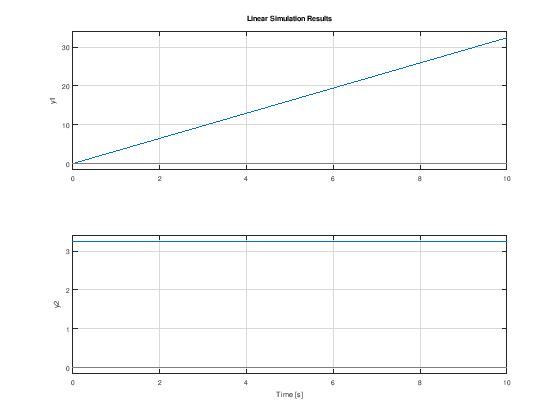

In [2]:
clear all; close all;
pkg load control
pkg load signal
set(gcf,'Visible','on')
graphics_toolkit("gnuplot")

% First set up the parameters for the pendulum/Hover Copter Arm.
M = 0.0230 % Mass of the motor (kg)
m = 0.0264 % mass of the rod/arm (kg)
l = 0.25 % length of the hover copter arm (meters)
r1 = 0.005 % inner radius of rod/arm (m)
r2 = 0.006 % outer radius of rod/arm (m)
g = 9.81  % gravity (m/s^2)
%s = 1  %  -1 for hanging down; +1 for up
%R = 0.6 (Ohms) -> Not needed for this since the motor is off and isn't a pivot point

% Calculate TOTAL J (moment of inertia)
J = (m/12)*(3*(r1^2 + r2^2) + (2*l)^2) + M*l^2
% (using the I_y equation from https://amesweb.info/inertia/hollow-cylinder-moment-of-inertia.aspx)

function [CopterSys, A, B, C, D] = setupModel(M=0.0230, m=0.0264, l=0.25, g=9.81, s=1, J=0.001988)
    % State model ve
    A = [[0, 1];[0, 0]];
    B = [0; l/J];
    C = [[1, 0]; [0, 1]];
    D = 0;
    CopterSys = ss(A, B, C, D);
endfunction

[CopterSys, A, B, C, D] = setupModel();
A
B
C

t = 0:0.01:10;
lsim(CopterSys,zeros(size(t)),t,[0;pi+0.1])
disp('Eigenvectors and eigenvalues of A:')
[v,D] = eig(CopterSys.a) % Better be all negative for hanging down.

